In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ranksums, ttest_ind

In [205]:
sns.set(style = 'whitegrid')

In [206]:
df = pd.read_excel('11658_2022_316_MOESM2_ESM.xlsx', )

In [207]:
df.head()

,Gene ID,Gene Symbol,Type,control1 Read Count,control2 Read Count,control3 Read Count,control4 Read Count,model1 Read Count,model2 Read Count,model3 Read Count,model4 Read Count,model Average Read Count,control Average Read Count,log2 (model/control),Pvalue(control-vs-model),Qvalue (control-vs-model)
0,258300,Olfr1449,mRNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,74277,Chic2,mRNA,773.63,740.03,759.78,799.81,675.27,762.6,751.19,736.69,731.4375,768.3125,-0.125574,0.000750,0.003355
2,104183,Chil4,mRNA,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.2500,0.0000,NaN,NaN,NaN
3,67836,Wdr83,mRNA,176.00,160.00,146.00,149.00,157.00,194.0,169.00,120.00,160.0000,157.7500,-0.034184,0.672733,0.819578
4,432552,Fam71b,mRNA,0.00,0.00,0.00,1.00,0.00,0.0,0.00,0.00,0.0000,0.2500,NaN,NaN,NaN


In [208]:
df.isna()

,Gene ID,Gene Symbol,Type,control1 Read Count,control2 Read Count,control3 Read Count,control4 Read Count,model1 Read Count,model2 Read Count,model3 Read Count,model4 Read Count,model Average Read Count,control Average Read Count,log2 (model/control),Pvalue(control-vs-model),Qvalue (control-vs-model)
0,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22894,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
22895,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
22896,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
22897,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [209]:
df.describe()

,control1 Read Count,control2 Read Count,control3 Read Count,control4 Read Count,model1 Read Count,model2 Read Count,model3 Read Count,model4 Read Count,model Average Read Count,control Average Read Count,log2 (model/control),Pvalue(control-vs-model),Qvalue (control-vs-model)
count,18802.000000,18802.000000,18802.000000,18802.000000,18802.000000,18802.000000,18802.000000,18802.000000,18802.000000,18802.000000,18013.000000,18013.000000,18013.000000
mean,1482.368456,1506.210951,1419.747133,1498.867923,1547.296388,1585.237301,1547.737886,1527.083616,1551.838798,1476.798616,-0.067973,0.215234,0.290293
std,4465.061770,4491.571305,4291.012564,4613.903461,5013.688269,4999.441450,4841.821196,4823.279166,4912.866715,4457.377686,0.512654,0.298222,0.343900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.020169,0.000000,0.000000
25%,34.000000,35.000000,34.000000,37.000000,31.000000,36.000000,33.002500,34.000000,34.252500,35.500000,-0.180648,0.000004,0.000029
50%,404.000000,412.470000,388.000000,406.000000,385.000000,405.935000,395.000000,398.000000,397.000000,402.278750,-0.048197,0.036651,0.102565
75%,1449.000000,1469.000000,1390.000000,1444.750000,1445.060000,1492.920000,1453.817500,1442.135000,1458.658125,1439.400625,0.077229,0.375743,0.581887
max,263205.000000,249045.000000,246942.000000,290216.000000,327618.000000,311265.000000,281758.000000,305843.000000,306621.000000,262352.000000,9.828537,0.999683,1.000000


In [210]:
df_fgf13 = df[df['Gene Symbol'] == 'Fgf13'].iloc[:,0:11]
df_fgf13

,Gene ID,Gene Symbol,Type,control1 Read Count,control2 Read Count,control3 Read Count,control4 Read Count,model1 Read Count,model2 Read Count,model3 Read Count,model4 Read Count
9375,14168,Fgf13,mRNA,9329.95,9701.99,9195.31,9785.67,11746.37,11414.96,11579.83,10687.66


In [211]:
df_fgf13 = df_fgf13.melt(id_vars=['Gene ID','Gene Symbol', 'Type'], var_name='Subject', value_name='Read Count')
df_fgf13

,Gene ID,Gene Symbol,Type,Subject,Read Count
0,14168,Fgf13,mRNA,control1 Read Count,9329.95
1,14168,Fgf13,mRNA,control2 Read Count,9701.99
2,14168,Fgf13,mRNA,control3 Read Count,9195.31
3,14168,Fgf13,mRNA,control4 Read Count,9785.67
4,14168,Fgf13,mRNA,model1 Read Count,11746.37
5,14168,Fgf13,mRNA,model2 Read Count,11414.96
6,14168,Fgf13,mRNA,model3 Read Count,11579.83
7,14168,Fgf13,mRNA,model4 Read Count,10687.66


In [212]:
df_fgf13['Control'] = df_fgf13['Subject'].apply(lambda x: True if 'control' in x else False)
df_fgf13

,Gene ID,Gene Symbol,Type,Subject,Read Count,Control
0,14168,Fgf13,mRNA,control1 Read Count,9329.95,True
1,14168,Fgf13,mRNA,control2 Read Count,9701.99,True
2,14168,Fgf13,mRNA,control3 Read Count,9195.31,True
3,14168,Fgf13,mRNA,control4 Read Count,9785.67,True
4,14168,Fgf13,mRNA,model1 Read Count,11746.37,False
5,14168,Fgf13,mRNA,model2 Read Count,11414.96,False
6,14168,Fgf13,mRNA,model3 Read Count,11579.83,False
7,14168,Fgf13,mRNA,model4 Read Count,10687.66,False


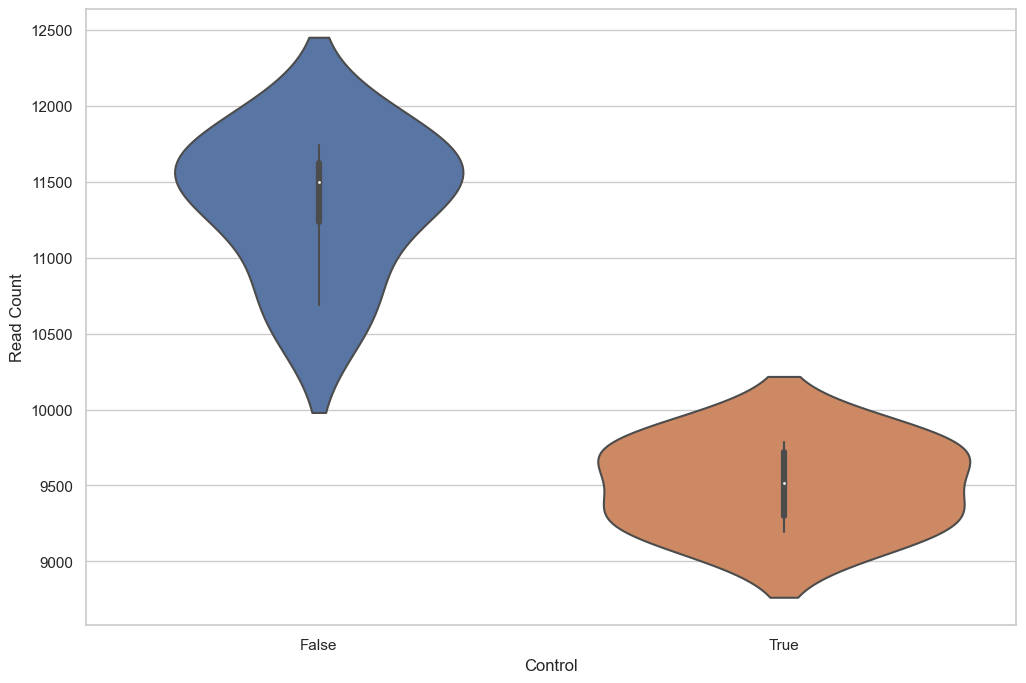

In [213]:
fig1 = plt.figure(figsize=(12,8))
ax = sns.violinplot(data=df_fgf13, x='Control', y='Read Count')
ax.set_xlabel('Control')

#fig100.savefig(os.path.join(data_path,"violinplot-tissue.svg"), format='svg', facecolor='w')

plt.show()

In [214]:
a = df_fgf13[df_fgf13['Control'] == True]['Read Count']
b = df_fgf13[df_fgf13['Control'] == False]['Read Count']

a = a.dropna()
b = b.dropna()

print(f'P-value: {ttest_ind(a,b).pvalue:.2e}')

P-value: 5.03e-04


### For the second gene: Scn9a

In [215]:
df_scn9a = df[df['Gene Symbol'] == 'Scn9a'].iloc[:,:11]

In [216]:
df_scn9a = df_scn9a.melt(id_vars=['Gene ID','Gene Symbol', 'Type'], var_name='Subject', value_name='Read Count')
df_scn9a

,Gene ID,Gene Symbol,Type,Subject,Read Count
0,20274,Scn9a,mRNA,control1 Read Count,16823.49
1,20274,Scn9a,mRNA,control2 Read Count,18161.24
2,20274,Scn9a,mRNA,control3 Read Count,18022.55
3,20274,Scn9a,mRNA,control4 Read Count,18095.49
4,20274,Scn9a,mRNA,model1 Read Count,21004.28
5,20274,Scn9a,mRNA,model2 Read Count,20244.48
6,20274,Scn9a,mRNA,model3 Read Count,20048.03
7,20274,Scn9a,mRNA,model4 Read Count,19556.60


In [217]:
df_scn9a['Control'] = df_scn9a['Subject'].apply(lambda x: True if 'control' in x else False)
df_scn9a

,Gene ID,Gene Symbol,Type,Subject,Read Count,Control
0,20274,Scn9a,mRNA,control1 Read Count,16823.49,True
1,20274,Scn9a,mRNA,control2 Read Count,18161.24,True
2,20274,Scn9a,mRNA,control3 Read Count,18022.55,True
3,20274,Scn9a,mRNA,control4 Read Count,18095.49,True
4,20274,Scn9a,mRNA,model1 Read Count,21004.28,False
5,20274,Scn9a,mRNA,model2 Read Count,20244.48,False
6,20274,Scn9a,mRNA,model3 Read Count,20048.03,False
7,20274,Scn9a,mRNA,model4 Read Count,19556.60,False


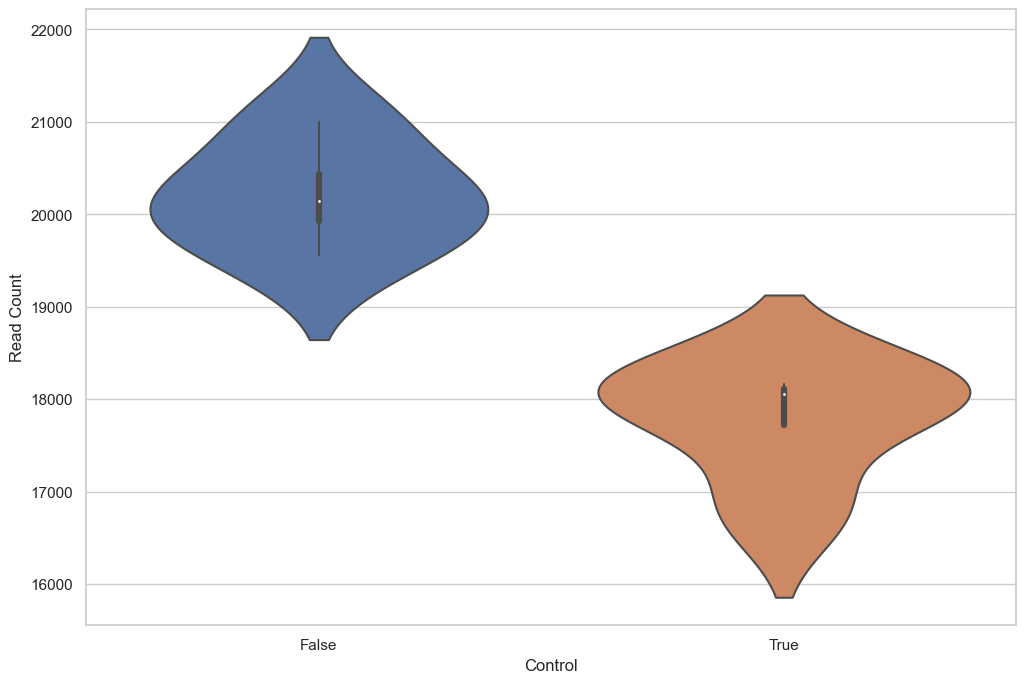

In [218]:
fig2 = plt.figure(figsize=(12,8))
ax = sns.violinplot(data=df_scn9a, x='Control', y='Read Count')
ax.set_xlabel('Control')

#fig100.savefig(os.path.join(data_path,"violinplot-tissue.svg"), format='svg', facecolor='w')

plt.show()

In [219]:
a = df_scn9a[df_scn9a['Control'] == True]['Read Count']
b = df_scn9a[df_scn9a['Control'] == False]['Read Count']

a = a.dropna()
b = b.dropna()

print(f'P-value: {ttest_ind(a,b).pvalue:.2e}')

P-value: 1.43e-03


In [220]:
from copy import deepcopy


def plot_volcano(results_all, labels=None, fc_threshold=0.3, pvalue_threshold=1.5):
    
    col = np.where(results_all['fc'] < -fc_threshold,'r',np.where(results_all['fc'] > fc_threshold,'g','k'))

    p = -np.log10(results_all['p'].values + 1e-100)
    fc = results_all['fc'].values

    mx, Mx = np.min(fc), np.max(fc)
    my, My = np.nanmin(p), np.nanmax(p)
    print(my, My)
    

    #p[p > 30] = 30

    labels_significant = []

    if labels is not None:
        fig = plt.figure(figsize=(14,12))
        plt.plot([mx,Mx], [pvalue_threshold, pvalue_threshold], 'k')
        plt.plot([-fc_threshold, -fc_threshold], [my, My], 'k')
        plt.plot([fc_threshold, fc_threshold], [my, My], 'k')
        plt.scatter(fc, p, c=col)
        shownlabels = []
        l_ha = ['right','left']

        for i in range(results_all.shape[0]): 

            x = fc[i]
            y = p[i]
            aa = np.random.rand()*3 - 1.5 + 0.5 * np.sign(x)
            ii = np.sign(aa) * 0.5 + 0.5
            if (np.abs(x) > fc_threshold) and (y > pvalue_threshold):
                l = plt.text(x+0.1*aa, y, 
                            results_all.iloc[i][labels],ha=l_ha[int(ii)], va='center', color='k', 
                            fontsize=10, zorder=10,bbox=dict(facecolor='w', edgecolor='#777777', boxstyle='round', linewidth=.5, pad=.2))
                shownlabels.append(l)
                labels_significant.append(results_all.iloc[i][labels])

    #adjustlabels(fig, shownlabels)

    plt.xlabel('log FC',)
    plt.ylabel('-log10 (Pvalue)')
    plt.rc('axes', labelsize=18) 

    plt.show()
    return labels_significant

In [221]:
df_renamed = df.rename(columns={'log2 (model/control)': 'fc', 'Pvalue(control-vs-model)':'p'}) 

In [222]:
df_renamed.head()

,Gene ID,Gene Symbol,Type,control1 Read Count,control2 Read Count,control3 Read Count,control4 Read Count,model1 Read Count,model2 Read Count,model3 Read Count,model4 Read Count,model Average Read Count,control Average Read Count,fc,p,Qvalue (control-vs-model)
0,258300,Olfr1449,mRNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,74277,Chic2,mRNA,773.63,740.03,759.78,799.81,675.27,762.6,751.19,736.69,731.4375,768.3125,-0.125574,0.000750,0.003355
2,104183,Chil4,mRNA,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.2500,0.0000,NaN,NaN,NaN
3,67836,Wdr83,mRNA,176.00,160.00,146.00,149.00,157.00,194.0,169.00,120.00,160.0000,157.7500,-0.034184,0.672733,0.819578
4,432552,Fam71b,mRNA,0.00,0.00,0.00,1.00,0.00,0.0,0.00,0.00,0.0000,0.2500,NaN,NaN,NaN


In [223]:
df_renamed.dropna(subset=['fc'], inplace=True)
df_renamed.head()

,Gene ID,Gene Symbol,Type,control1 Read Count,control2 Read Count,control3 Read Count,control4 Read Count,model1 Read Count,model2 Read Count,model3 Read Count,model4 Read Count,model Average Read Count,control Average Read Count,fc,p,Qvalue (control-vs-model)
1,74277,Chic2,mRNA,773.63,740.03,759.78,799.81,675.27,762.60,751.19,736.69,731.4375,768.3125,-0.125574,7.500000e-04,3.354519e-03
3,67836,Wdr83,mRNA,176.00,160.00,146.00,149.00,157.00,194.00,169.00,120.00,160.0000,157.7500,-0.034184,6.727333e-01,8.195782e-01
7,28109,D10Wsu102e,mRNA,944.00,925.00,876.00,901.00,899.00,969.00,908.00,893.00,917.2500,911.5000,-0.045543,1.769778e-01,3.469744e-01
8,240427,Setbp1,mRNA,5921.42,6691.43,6296.58,6416.85,5610.91,5965.05,5392.33,5691.54,5664.9575,6331.5700,-0.215114,6.920000e-60,3.420000e-58
10,93685,Entpd7,mRNA,814.00,873.00,752.00,771.00,829.00,925.00,826.00,759.00,834.7500,802.5000,0.002227,9.501949e-01,9.977562e-01


In [224]:
df_filtered = df_renamed.iloc[[any([y in str(x).lower() for y in['fgf','scn','giak','stat','gsk','erk']]) for x in df_renamed['Gene Symbol'].values],:]
df_filtered.head()

,Gene ID,Gene Symbol,Type,control1 Read Count,control2 Read Count,control3 Read Count,control4 Read Count,model1 Read Count,model2 Read Count,model3 Read Count,model4 Read Count,model Average Read Count,control Average Read Count,fc,p,Qvalue (control-vs-model)
338,20278,Scnn1g,mRNA,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.75,1.00,0.752739,3.960165e-01,6.003608e-01
561,64654,Fgf23,mRNA,14.0,16.0,7.0,15.0,8.0,12.0,8.0,13.0,10.25,13.00,-0.397503,1.855039e-01,3.569568e-01
674,14184,Fgfr3,mRNA,95.0,123.0,70.0,103.0,39.0,67.0,71.0,58.0,58.75,97.75,-0.789124,1.640000e-11,1.770000e-10
1355,20276,Scnn1a,mRNA,18.0,25.0,17.0,28.0,22.0,25.0,23.0,36.0,26.50,22.00,0.213873,3.028813e-01,5.043754e-01
1415,14182,Fgfr1,mRNA,6055.0,6338.0,5524.0,6409.0,6082.0,6506.0,5876.0,6040.0,6126.00,6081.50,-0.044098,7.310000e-04,3.278372e-03


In [225]:
print(df_renamed['Gene Symbol'].values)

['Chic2' 'Wdr83' 'D10Wsu102e' ... 'Rec114' 'Wdr5' 'Mpst']


0.003611134529593739 100.0


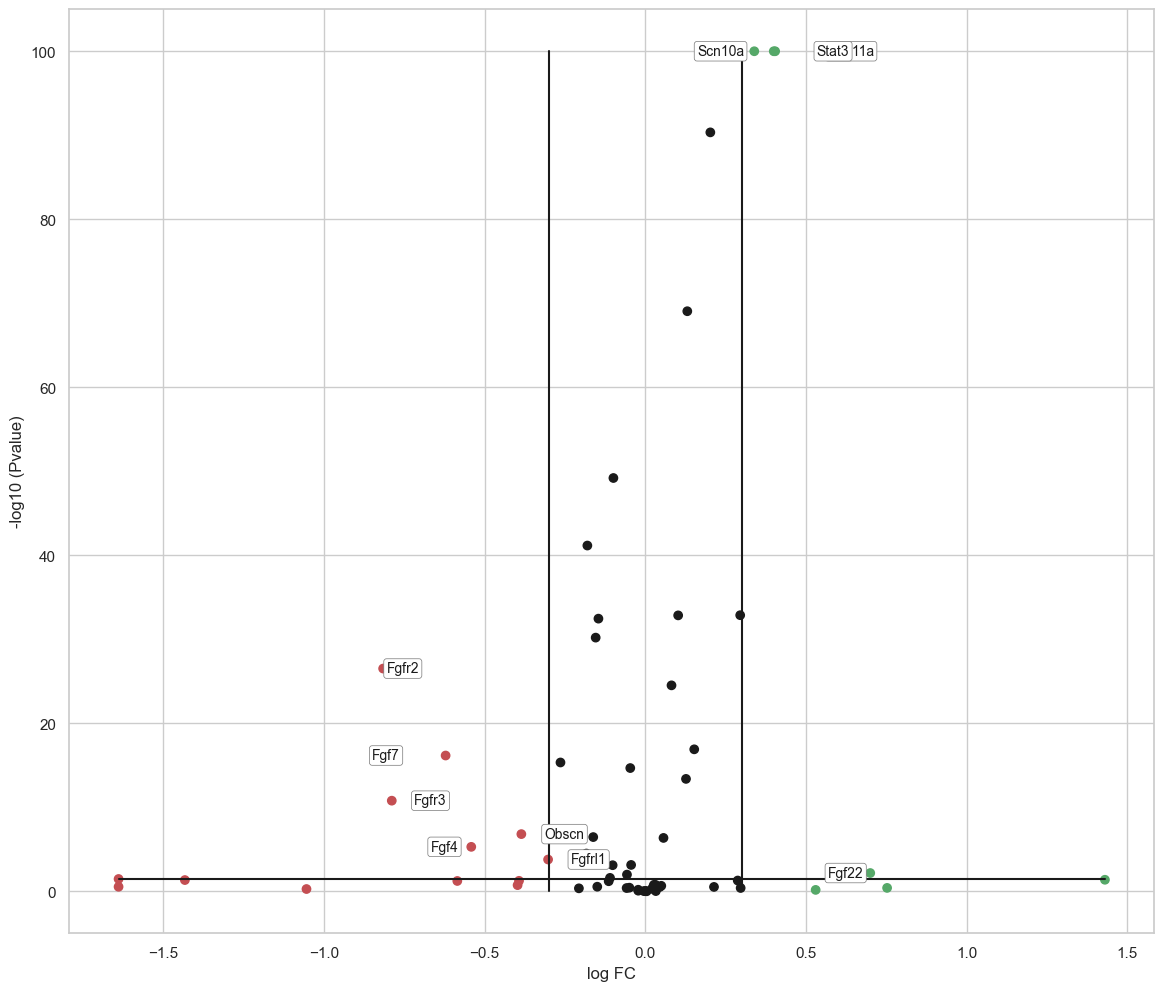

In [226]:
sig_lab = plot_volcano(df_filtered, labels='Gene Symbol')

In [227]:
def plot_clustermap(data_in, significant_in=None):
    fig = sns.clustermap(data=data_in,
            row_cluster=False,
            figsize=(14,6),cmap='vlag', xticklabels=True, cbar=False)
    if significant_in is not None:
        for tick_label in fig.ax_heatmap.axes.get_xticklabels():
                tick_label.set_size(10)
                if tick_label.get_text() in sig_lab:
                        tick_label.set_weight('bold')
                        tick_label.set_color('red')
    fig.cax.set_visible(False)
    plt.show()

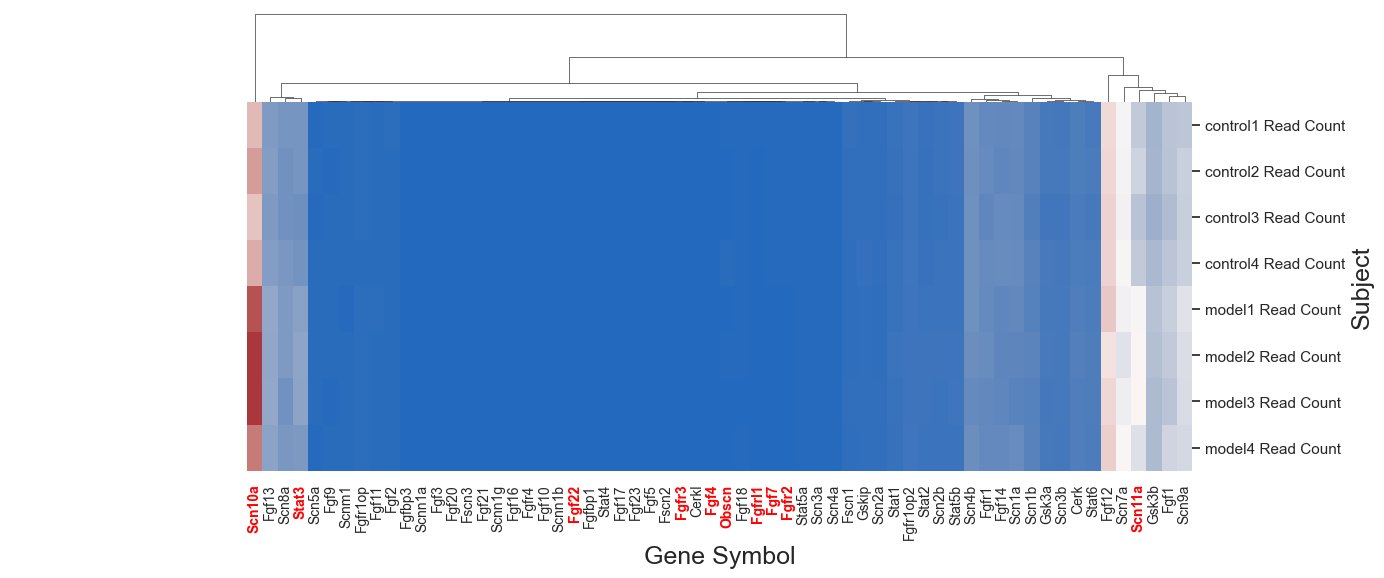

In [228]:
df_melt = df_filtered.iloc[:,:11].melt(id_vars=['Gene ID','Gene Symbol', 'Type'], var_name='Subject', value_name='Read Count')

pivot_kws=[
        'Subject',
        'Gene Symbol',
        'Read Count'
]
data_pivot = df_melt.pivot(*pivot_kws).sort_index()

plot_clustermap(data_pivot, sig_lab)

In [229]:
df_filtered_normalized = df_filtered.copy(deep=True)
data_normalized = df_filtered_normalized.iloc[:,3:11].values - np.min(df_filtered.iloc[:,3:11].values, axis=1).reshape(-1,1)
data_normalized = data_normalized / np.max(data_normalized, axis=1).reshape(-1,1)
df_filtered_normalized.iloc[:,3:11] = data_normalized
df_filtered_normalized.head()

,Gene ID,Gene Symbol,Type,control1 Read Count,control2 Read Count,control3 Read Count,control4 Read Count,model1 Read Count,model2 Read Count,model3 Read Count,model4 Read Count,model Average Read Count,control Average Read Count,fc,p,Qvalue (control-vs-model)
338,20278,Scnn1g,mRNA,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.75,1.00,0.752739,3.960165e-01,6.003608e-01
561,64654,Fgf23,mRNA,0.777778,1.000000,0.000000,0.888889,0.111111,0.555556,0.111111,0.666667,10.25,13.00,-0.397503,1.855039e-01,3.569568e-01
674,14184,Fgfr3,mRNA,0.666667,1.000000,0.369048,0.761905,0.000000,0.333333,0.380952,0.226190,58.75,97.75,-0.789124,1.640000e-11,1.770000e-10
1355,20276,Scnn1a,mRNA,0.052632,0.421053,0.000000,0.578947,0.263158,0.421053,0.315789,1.000000,26.50,22.00,0.213873,3.028813e-01,5.043754e-01
1415,14182,Fgfr1,mRNA,0.540733,0.828921,0.000000,0.901222,0.568228,1.000000,0.358452,0.525458,6126.00,6081.50,-0.044098,7.310000e-04,3.278372e-03


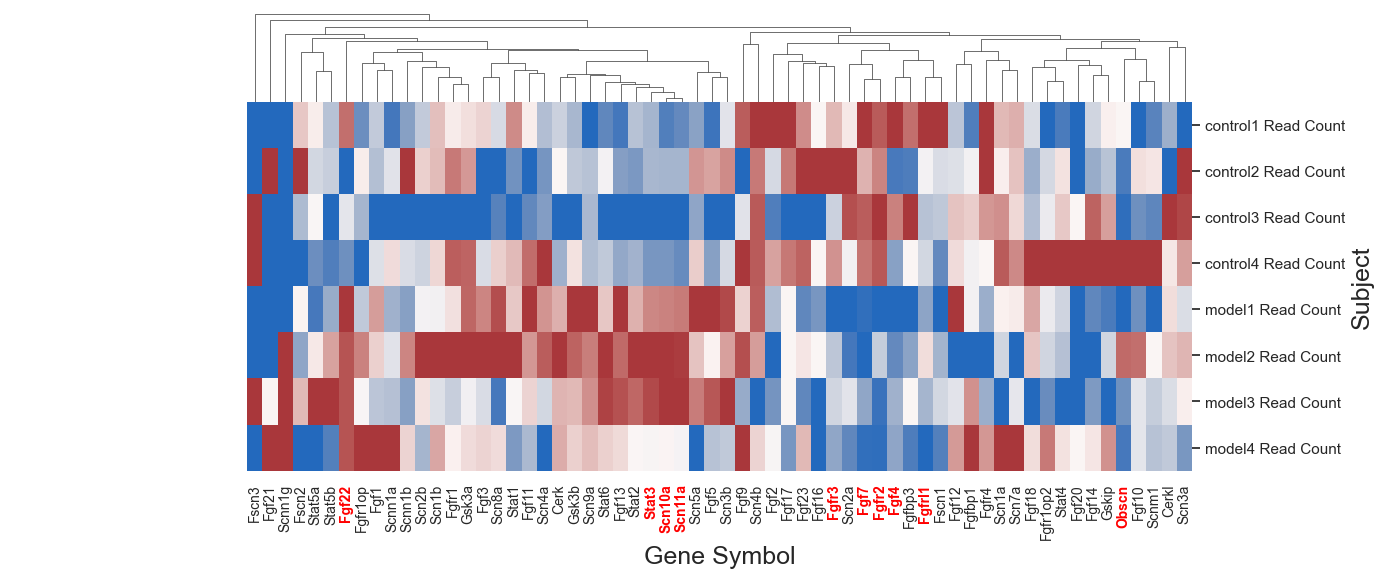

In [230]:
df_melt_normalized = df_filtered_normalized.iloc[:,:11].melt(id_vars=['Gene ID','Gene Symbol', 'Type'], var_name='Subject', value_name='Read Count')

pivot_kws=[
        'Subject',
        'Gene Symbol',
        'Read Count'
]
data_pivot = df_melt_normalized.pivot(*pivot_kws).sort_index()

plot_clustermap(data_pivot, sig_lab)